In [37]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


In [38]:
df = pd.read_excel('code-review-data.xlsx')
df.loc[df["Sentiment"] == "pass", "Sentiment"] = 'Pass'

In [39]:
data = df[['Review','Sentiment']]

In [40]:
data['Sentiment']=data['Sentiment'].map({'Fail':0,'Pass':1})

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_14420\2638319171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment']=data['Sentiment'].map({'Fail':0,'Pass':1})


In [41]:
def concat_reviews(my_string):
    review_list = my_string.splitlines()[0:10]
    while '' in review_list:
        review_list.remove('')
    review_list = ' '.join(review_list)
    return review_list

In [42]:
data['Review'] = data['Review'].apply(concat_reviews)

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_14420\2014086995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(concat_reviews)


In [43]:
data['Sentiment'].value_counts()    

Sentiment
0    64
1    37
Name: count, dtype: int64

In [44]:
X = data.drop(['Sentiment'],axis=1)
y = data['Sentiment']

In [45]:
X.shape,y.shape

((101, 1), (101,))

<Axes: xlabel='Sentiment', ylabel='Count'>

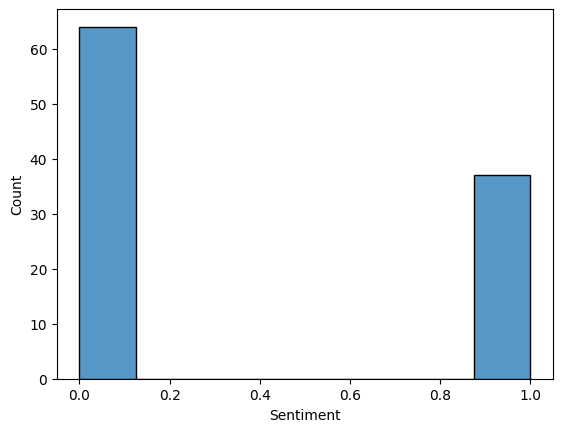

In [46]:
import seaborn as sns
sns.histplot(y)

In [47]:
stopwords_list = set(stopwords.words("english"))
print(f'List of stopwords:\n{stopwords_list}\n')

# We remove negation words in list of stopwords
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)
    
#print(stopwords_list)
print(f'Final list of stopwords:\n{stopwords_list}')

List of stopwords:
{'other', "doesn't", 'he', 'm', 'herself', 'yours', 'who', 'nor', 'yourselves', 'aren', 'against', 'any', 'what', 'being', 'those', 'up', 'over', 'will', 'are', "haven't", 'until', 'ourselves', 'from', "aren't", 'his', "wasn't", 'below', 'when', 'here', "you'll", 'wouldn', 't', 'some', 'all', 'won', 'hadn', 'it', 'i', 'out', 'whom', 'mustn', 'by', 'needn', 'were', 'haven', 'so', 'each', 'no', 'was', 'if', "should've", 'ours', 'didn', 'than', "needn't", 'while', 'its', 'because', 'they', 'and', 'o', "weren't", 'about', "hasn't", 'be', 'very', 'more', "shouldn't", 'at', "won't", 'do', 'a', 'doing', 'she', 'you', 'him', 'hers', 'through', "you're", 'me', 'which', 'in', 'own', 're', "hadn't", "it's", 'how', 'that', 'themselves', "she's", 'did', 'should', 'to', 'above', 'there', 'does', 'can', 'off', 'during', 'yourself', 'them', 'again', 'for', 'don', 'between', 'our', 'himself', "don't", 'where', "mustn't", 'before', 'hasn', 'shouldn', "that'll", 'been', 'as', 'of', 'th

In [48]:
# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# function that receive a list of words and do lemmatization:
def lemma_stem_text(words_list):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    return text

word_example = "feet"
print(f'The word "{word_example}" is transformed to "{lemma_stem_text([word_example])[0]}"')

The word "feet" is transformed to "foot"


In [49]:
import re
re_negation = re.compile("n't ")

# function that receive a sequence of woords and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

word_example = "I aren't "
print(f'The sentence "{word_example}" is transformed to "{negation_abbreviated_to_standard(word_example)}"')

The sentence "I aren't " is transformed to "I are not "


In [50]:
def review_to_words(raw_review):
    
    
    # 2. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(raw_review)
    
    # 3. Remove non-letters and non-numbers   
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text) 
    
    # 4. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())                             
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]   
    
    # 6. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)
    
    # 7. Join the words back into one string separated by space, and return the result.
    return( " ".join(lemma_words))   

In [51]:
# Clean first review
clean_review = review_to_words(X["Review"][0] )

# Print original review, sentiment and cleaned review
print(f'Text of original review:\n{X["Review"][0]}\n')
print(f'Sentiment review: {y[0]}\n')
print(f'Text of cleaned review:\n{clean_review}') 

Text of original review:
Overall, the code seems to be sorting an integer array in ascending order using a simple bubble sort algorithm. Here are some specific comments and suggestions: The code is missing proper comments that can help other developers understand what it does. Consider adding comments that explain the purpose of the code and the various variables and logic. The temp variable should be declared inside the inner loop, as it is only used there. This can help reduce unnecessary memory usage. Instead of using <= in the outer loop, it is better to use < to make the loop run only up to the second-to-last element in the array. This can help avoid potential index out of range errors. It is generally better to use var instead of explicitly declaring the loop variable types when iterating over a collection, as this can make the code more concise and easier to read.

Sentiment review: 0

Text of cleaned review:
overall code seem sort integer array ascend order use simple bubble so

In [52]:
# We get the text of reviews in the training set
reviews = X['Review']

# We initialize an empty list to add the clean reviews
cleaned_train_reviews = []

# We loop over each review and clean it  
for i in reviews:
    cleaned_train_reviews.append(review_to_words(i))

In [53]:
# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hiperparameters of encoded
vectorizer = TfidfVectorizer(max_features=20000, ngram_range = (1,2))

# Create the training set with the words encoded as features of the reviews
train_data_features = vectorizer.fit_transform(cleaned_train_reviews)

pickle.dump(vectorizer, open('tfidf.pkl','wb'))
train_data_features.shape

(101, 5579)

In [54]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train model
model.fit(train_data_features, y)

LogisticRegression(multi_class='multinomial', random_state=0)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_features, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,
                                bootstrap = True, random_state=0)
# Train the model
forest = forest.fit(X_train, y_train)
# Print score of model(using test dataset)
print(forest.score(X_test, y_test))

0.6666666666666666


In [57]:
logistic = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train the model
logistic = logistic.fit(X_train, y_train)
# Print score of model(using test dataset)
print(logistic.score(X_test, y_test))

0.6190476190476191


In [58]:
import pickle
import os

pickle.dump(forest, open('model.pkl','wb'))
pickle.dump(logistic,open('logistic_model.pkl','wb'))

In [59]:
model = pickle.load(open('model.pkl','rb'))
prediction = model.predict(X_train[0])
prediction

array([0], dtype=int64)

In [60]:
prediction == 1

array([False])